# Assignment8

In [3]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [4]:
df = pd.read_csv("car_data(1).csv")  #reading data

In [5]:
df.head()  

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


TASK 1

In [7]:
df[["Mileage","Price"]].corr()

#there is no linear relationship between mileage and price

#if we fit linear reg we wont get a good model with Mileage vs price

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


In [8]:
# determing the outliers in Mileage column 
q1,q3=np.percentile(df["Mileage"],[25,75]) 
print("25th percentile:",q1 ,"75th percentile:",q3)

IQR=q3-q1
print("IQR for Mileage is :" ,IQR)

upper=q3+1.5*IQR
lower=q1-1.5*IQR

print("upper for Mileage :",upper,"lower for Mileage :",lower)
list1=[]
for i in df["Mileage"].values:
   if i<upper and i>lower :
     list1.append(i)

print(list1)

25th percentile: 14623.5 75th percentile: 25213.0
IQR for Mileage is : 10589.5
upper for Mileage : 41097.25 lower for Mileage : -1260.75
[8221, 9135, 13196, 16342, 19832, 22236, 22576, 22964, 24021, 27325, 10237, 15066, 16633, 19800, 23359, 23765, 24008, 26034, 32896, 34665, 8970, 10577, 14363, 16508, 18908, 19467, 21394, 22596, 24469, 25245, 15755, 16235, 18147, 22102, 23612, 24439, 25212, 26779, 27096, 29649, 2992, 10036, 18339, 19592, 21797, 23852, 25040, 25052, 25464, 27830, 17353, 17787, 19562, 20137, 20158, 23767, 24323, 27839, 29187, 31324, 2308, 10014, 18910, 20105, 20453, 22287, 23237, 23798, 25489, 25564, 4695, 9795, 12052, 13050, 17335, 17480, 24027, 25387, 25869, 37128, 2202, 6685, 15343, 21341, 21367, 23371, 23751, 24052, 25199, 30082, 6598, 10625, 11013, 14937, 17094, 17870, 18449, 21039, 21056, 27484, 14095, 14743, 16041, 17138, 18661, 21966, 24415, 25163, 25339, 25421, 5499, 8125, 12791, 14452, 21593, 22211, 25153, 26250, 36074, 6447, 10555, 11975, 13449, 17508, 18661, 

In [9]:
# determing the outliers in Price column 
q1,q3=np.percentile(df["Price"],[25,75]) 
print("25th percentile:",q1 ,"75th percentile:",q3)

IQR=q3-q1
print("IQR for Price is :" ,IQR)

upper=q3+1.5*IQR
lower=q1-1.5*IQR

print("upper for Price :",upper,"lower for Price :",lower)
list2=[]
for i in df["Price"].values:
   if i<upper and i>lower :
     list2.append(i)

print(list2)

25th percentile: 14273.073870330325 75th percentile: 26717.3166356619
IQR for Price is : 12444.242765331575
upper for Price : 45383.68078365926 lower for Price : -4393.290277667038
[17314.1031289016, 17542.0360832793, 16218.8478619377, 16336.9131400486, 16339.1703239255, 15709.0528210833, 15230.0033898479, 15048.042184116, 14862.0938695978, 15295.0182668788, 21335.852484891, 20538.0875102254, 20512.0940912389, 19924.159052404, 19774.2490660661, 19344.1655373569, 19105.1301244159, 18543.4270453653, 17808.1989960206, 17968.8382782646, 22358.8776781171, 23785.9225263772, 22926.0903712553, 21895.7587842006, 21273.0617139201, 21460.0139528911, 21183.1235874235, 20406.0995028936, 21058.1395799539, 19556.8993202892, 23447.6865610148, 23547.2394428773, 23016.0080086817, 22230.0275025572, 22625.0735660496, 21799.1720968887, 21341.2572070745, 21683.0314635547, 20986.0160174846, 20902.1037943119, 20698.077083173, 20099.25684484, 18145.1264890935, 17944.8569234593, 19027.8623054345, 18348.89857169

In [10]:
#removing the outliers
new_df=df[(df["Mileage"].isin(list1))&(df["Price"].isin(list2))]
new_df.head()   

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [11]:
new_df.describe() # after deleting the extreme values 

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,20553.669684,19844.111111,5.208174,2.995658,3.547893,0.745849,0.675607,0.716475
std,8388.076034,7836.723855,1.340433,1.077072,0.837083,0.435661,0.468447,0.450997
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14200.544806,14806.000000,4.000000,2.200000,4.000000,0.000000,0.000000,0.000000
50%,17808.198996,21013.000000,4.000000,2.500000,4.000000,1.000000,1.000000,1.000000
75%,25558.498091,25184.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,45061.951935,40719.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [12]:
new_df[["Mileage","Price"]].corr()

#there is no linear relationship between Mileage and price

,Mileage,Price
Mileage,1.000000,-0.111189
Price,-0.111189,1.000000


In [13]:
X=new_df["Mileage"].values
y=X=new_df["Price"].values

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  #80% is train data 

In [15]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1)) 

LinearRegression()

In [16]:
m=regressor.coef_
m[0][0]

0.9999999999999998

In [17]:
c=regressor.intercept_
c[0]

3.637978807091713e-12

In [18]:
print("The linear regression equation : {:.2f}(Mileage) +{:.2f}".format(m[0][0],c[0]))

The linear regression equation : 1.00(Mileage) +0.00


In [19]:
#predicting for out tests data 
y_pred=regressor.predict(X_test.reshape(-1,1))

In [20]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


# mileage vs price gives a overfitted model hence mileage can be dropped 

R2- SCORE: 1.0


TASK 2

In [21]:
#task 2
#using these features 
new_df=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather","Price"]]
new_df.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [22]:
new_df=new_df[(new_df["Mileage"].isin(list1))&(new_df["Price"].isin(list2))]
new_df.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [23]:
new_df.describe()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,19844.111111,5.208174,2.995658,3.547893,0.745849,0.675607,0.716475,20553.669684
std,7836.723855,1.340433,1.077072,0.837083,0.435661,0.468447,0.450997,8388.076034
min,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000,8638.930895
25%,14806.000000,4.000000,2.200000,4.000000,0.000000,0.000000,0.000000,14200.544806
50%,21013.000000,4.000000,2.500000,4.000000,1.000000,1.000000,1.000000,17808.198996
75%,25184.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000,25558.498091
max,40719.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000,45061.951935


In [24]:
new_df.shape

(783, 8)

In [25]:
new_df.isnull().sum()

#no null values 

Mileage     0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
Price       0
dtype: int64

In [26]:
new_df.dtypes  # no problem in datatypes 

Mileage       int64
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
Price       float64
dtype: object

In [27]:
new_df.corr()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
Mileage,1.000000,0.004857,0.021322,-0.022436,0.027560,-0.023322,0.002049,-0.111189
Cylinder,0.004857,1.000000,0.957928,0.049796,0.346918,-0.112261,0.051221,0.519091
Liter,0.021322,0.957928,1.000000,-0.047567,0.371816,-0.083645,0.066961,0.532032
Doors,-0.022436,0.049796,-0.047567,1.000000,-0.034958,-0.048379,-0.048668,-0.048588
Cruise,0.027560,0.346918,0.371816,-0.034958,1.000000,-0.097462,-0.080843,0.461814
Sound,-0.023322,-0.112261,-0.083645,-0.048379,-0.097462,1.000000,0.163334,-0.185990
Leather,0.002049,0.051221,0.066961,-0.048668,-0.080843,0.163334,1.000000,0.129441
Price,-0.111189,0.519091,0.532032,-0.048588,0.461814,-0.185990,0.129441,1.000000


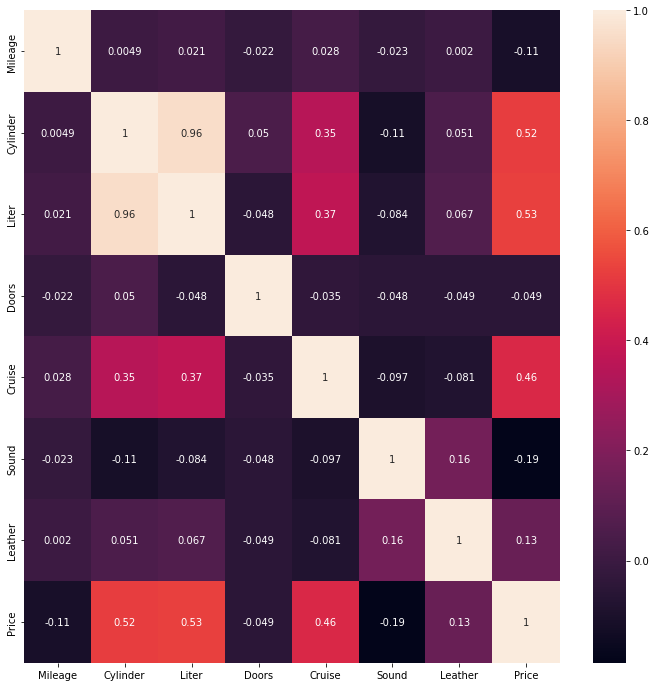

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12))
sns.heatmap(new_df.corr(),annot=True)


#from the heatmap we can cleary see only the Cylinder,litre and cruise have considerable linear relationship with the target varibale price

In [29]:
X=new_df.iloc[:,:-1]
y=new_df["Price"].values 

In [30]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [31]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [32]:
m=regressor.coef_
m

array([[-1.36469111e-01,  5.99943811e+02,  2.67599691e+03,
        -1.67121910e+02,  5.78546852e+03, -2.39144030e+03,
         2.52715053e+03]])

In [33]:
c=regressor.intercept_
c

array([8198.01094209])

In [34]:
print("The linear regression equation is : {:.2f}(Mileage)+{:.2f}(Cylinder)+{:.2f}(Liter)+{:.2f}(Doors)+{:.2f}(Cruise)+{:.2f}(Sound)+{:.2f}(Leather)+{:.2f}".format(m[0][0],m[0][1],m[0][2],m[0][3],m[0][4],m[0][5],m[0][6],c[0]))

The linear regression equation is : -0.14(Mileage)+599.94(Cylinder)+2676.00(Liter)+-167.12(Doors)+5785.47(Cruise)+-2391.44(Sound)+2527.15(Leather)+8198.01


In [35]:
y_pred=regressor.predict(X_test)

In [36]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#we dont get good r2 score with "Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather","Price" as features

R2- SCORE: 0.3448702297329038


In [37]:
# as we found columns cylinder,litre and cruise have better linear relationship with price
#lets do with only those 

new_df=new_df[["Cylinder","Liter","Cruise","Price"]]
new_df.head()

,Cylinder,Liter,Cruise,Price
0,6,3.1,1,17314.103129
1,6,3.1,1,17542.036083
2,6,3.1,1,16218.847862
3,6,3.1,1,16336.913140
4,6,3.1,1,16339.170324


In [38]:
X=new_df.iloc[:,:-1]
y=new_df["Price"].values 

In [39]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [41]:
m=regressor.coef_
m

array([[1101.33054327, 2175.34823844, 5579.1112285 ]])

In [42]:
c=regressor.intercept_
c

array([4113.33325122])

In [43]:
print("The linear regression equation is : {:.2f}(Cylinder)+{:.2f}(Liter)+{:.2f}(Cruise)+{:.2f}".format(m[0][0],m[0][1],m[0][2],c[0]))

The linear regression equation is : 1101.33(Cylinder)+2175.35(Liter)+5579.11(Cruise)+4113.33


In [44]:
y_pred=regressor.predict(X_test)

In [45]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#still we dont get good r2 score with "Cylinder","Liter","Cruise","Price" as features 

R2- SCORE: 0.32275079636107273


In [46]:
#lets use feature selector algoritm 

 # sequential feature selector for getting best R2 score for model 
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)  # finding top 2 features
sfs.fit(X_train, y_train)
print(list(zip(["Cylinder","Liter","Cruise","Price"],sfs.get_support())))

[('Cylinder', False), ('Liter', True), ('Cruise', True)]


In [47]:
#lets try with cylinder and cruise alone 

new_df=new_df[['Cylinder','Cruise',"Price"]]
new_df.head()

,Cylinder,Cruise,Price
0,6,1,17314.103129
1,6,1,17542.036083
2,6,1,16218.847862
3,6,1,16336.913140
4,6,1,16339.170324


In [48]:
X=new_df.iloc[:,:-1]
y=new_df["Price"].values

In [49]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [50]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [51]:
m=regressor.coef_
m

array([[2420.83811512, 6169.97777368]])

In [52]:
c=regressor.intercept_
c

array([3235.38381649])

In [53]:
print("The linear regression equation is : {:.2f}(Cylinder)+{:.2f}(Cruise)+{:.2f}".format(m[0][0],m[0][1],c[0]))

The linear regression equation is : 2420.84(Cylinder)+6169.98(Cruise)+3235.38


In [54]:
y_pred=regressor.predict(X_test)

In [55]:
#score with cylinder and cruise 
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.4150180999924914


In [56]:
new_df=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather","Price"]]
new_df.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [57]:
new_df=new_df[(new_df["Mileage"].isin(list1))&(new_df["Price"].isin(list2))]
new_df.head()

,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Price
0,8221,6,3.1,4,1,1,1,17314.103129
1,9135,6,3.1,4,1,1,0,17542.036083
2,13196,6,3.1,4,1,1,0,16218.847862
3,16342,6,3.1,4,1,0,0,16336.913140
4,19832,6,3.1,4,1,0,1,16339.170324


In [58]:
X=new_df.iloc[:,:-1]
y=new_df["Price"].values

In [59]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
 # sequential feature selector for getting best R2 score for model 
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)  # finding top 2 features
sfs.fit(X_train, y_train)
print(list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather","Price"],sfs.get_support())))

[('Mileage', False), ('Cylinder', False), ('Liter', True), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


In [61]:
#lets try with litre and cruise 
X=new_df[["Liter","Cruise"]]
y=new_df["Price"].values

In [62]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [63]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [64]:
c=regressor.intercept_
c

array([5969.11450077])

In [65]:
m=regressor.coef_
m

array([[3425.52962764, 5680.56835579]])

In [66]:
print("The linear regression equation is : {:.2f}(Litre)+{:.2f}(Cruise)+{:.2f}".format(m[0][0],m[0][1],c[0]))

The linear regression equation is : 3425.53(Litre)+5680.57(Cruise)+5969.11


In [67]:
y_pred=regressor.predict(X_test)

In [68]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.3265586813354088


TASK 3

In [69]:
#Task 3
new_df=df[(df["Mileage"].isin(list1))&(df["Price"].isin(list2))]
new_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [70]:
print(new_df["Make"].unique())
print("NO of categories in Make   :",new_df["Make"].nunique())

['Buick' 'Cadillac' 'Chevrolet' 'Pontiac' 'SAAB' 'Saturn']
NO of categories in Make   : 6


In [71]:
print(new_df["Model"].unique())
print("NO of categories in Model  :",new_df["Model"].nunique())

['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt' 'Corvette'
 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am' 'Grand Prix'
 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO' '9-2X AWD' 'Ion'
 'L Series']
NO of categories in Model  : 31


In [72]:
print(new_df["Trim"].unique())
print("NO of categories in Trim  :",new_df["Trim"].nunique())

['Sedan 4D' 'CX Sedan 4D' 'CXL Sedan 4D' 'CXS Sedan 4D' 'Custom Sedan 4D'
 'Limited Sedan 4D' 'Special Ed Ultra 4D' 'DHS Sedan 4D' 'DTS Sedan 4D'
 'LS Hatchback 4D' 'LS Sedan 4D' 'LT Hatchback 4D' 'LT Sedan 4D'
 'SVM Hatchback 4D' 'SVM Sedan 4D' 'Coupe 2D' 'LS Coupe 2D'
 'LS Sport Coupe 2D' 'LS Sport Sedan 4D' 'Conv 2D' 'SS Sedan 4D'
 'LS MAXX Hback 4D' 'LT MAXX Hback 4D' 'MAXX Hback 4D' 'LT Coupe 2D'
 'SS Coupe 2D' 'GXP Sedan 4D' 'SE Sedan 4D' 'SLE Sedan 4D' 'GT Sedan 4D'
 'GT Coupe 2D' 'GTP Sedan 4D' 'AWD Sportwagon 4D' 'GT Sportwagon'
 'Sportwagon 4D' 'Linear Conv 2D' 'Linear Sedan 4D' 'Aero Conv 2D'
 'Aero Sedan 4D' 'Arc Conv 2D' 'Arc Sedan 4D' 'Arc Wagon 4D'
 'Linear Wagon 4D' 'Aero Wagon 4D' 'Quad Coupe 2D' 'L300 Sedan 4D']
NO of categories in Trim  : 46


In [73]:
# as all the categorical column is multi class non ordinal lets do one hot encoding 

#with make and columns which has good linear relationship with price
new_df1=new_df[["Make","Cylinder","Liter","Doors","Cruise","Price"]]
new_df1=pd.get_dummies(new_df1)
new_df1.head()


,Cylinder,Liter,Doors,Cruise,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,6,3.1,4,1,17314.103129,1,0,0,0,0,0
1,6,3.1,4,1,17542.036083,1,0,0,0,0,0
2,6,3.1,4,1,16218.847862,1,0,0,0,0,0
3,6,3.1,4,1,16336.913140,1,0,0,0,0,0
4,6,3.1,4,1,16339.170324,1,0,0,0,0,0


In [74]:
X=new_df1.iloc[:,[0,1,2,3,5,6,7,8,9,10]]
y=new_df1["Price"].values
X.head()

,Cylinder,Liter,Doors,Cruise,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,6,3.1,4,1,1,0,0,0,0,0
1,6,3.1,4,1,1,0,0,0,0,0
2,6,3.1,4,1,1,0,0,0,0,0
3,6,3.1,4,1,1,0,0,0,0,0
4,6,3.1,4,1,1,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [76]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [77]:
c=regressor.intercept_
c

array([14846.59288619])

In [78]:
m=regressor.coef_
m

array([[-1152.43529914,  5670.94797907,  -833.93557634,  -612.95602148,
        -3639.56385053, 10317.85768677, -5910.42268573, -5420.80054615,
        10750.37767328, -6097.44827763]])

In [79]:
y_pred=regressor.predict(X_test)

In [80]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#we get good r2 score after using the make columns--> "Make","Cylinder","Liter","Doors","Cruise"

R2- SCORE: 0.8759384609483047


In [81]:
#lets do with model column

print(new_df["Model"].unique())
print("NO of categories in Model  :",new_df["Model"].nunique())

['Century' 'Lacrosse' 'Lesabre' 'Park Avenue' 'CST-V' 'CTS' 'Deville'
 'STS-V6' 'STS-V8' 'AVEO' 'Cavalier' 'Classic' 'Cobalt' 'Corvette'
 'Impala' 'Malibu' 'Monte Carlo' 'Bonneville' 'G6' 'Grand Am' 'Grand Prix'
 'GTO' 'Sunfire' 'Vibe' '9_3' '9_3 HO' '9_5' '9_5 HO' '9-2X AWD' 'Ion'
 'L Series']
NO of categories in Model  : 31


In [82]:
new_df2=new_df[["Model","Cylinder","Liter","Doors","Cruise","Price"]]
new_df2.head()

,Model,Cylinder,Liter,Doors,Cruise,Price
0,Century,6,3.1,4,1,17314.103129
1,Century,6,3.1,4,1,17542.036083
2,Century,6,3.1,4,1,16218.847862
3,Century,6,3.1,4,1,16336.913140
4,Century,6,3.1,4,1,16339.170324


In [83]:
new_df2["Model"]=new_df2["Model"].astype("str")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
# as model columns has 31 categories lets do one hot encoding with top 10 categories 

top_10_model=new_df2["Model"].value_counts().head(10)
top_10_model

Malibu         60
AVEO           60
Cavalier       60
Cobalt         50
Ion            50
9_3 HO         39
Grand Prix     30
Bonneville     30
Monte Carlo    30
Lacrosse       30
Name: Model, dtype: int64

In [85]:
list_10=top_10_model.index.to_list()
list_10

['Malibu',
 'AVEO',
 'Cavalier',
 'Cobalt',
 'Ion',
 '9_3 HO',
 'Grand Prix',
 'Bonneville',
 'Monte Carlo',
 'Lacrosse']

In [86]:
import numpy as np
for i in list_10:
  new_df2[i]=np.where(new_df2["Model"]==i,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [87]:
list_10.extend(["Cylinder","Liter","Doors","Cruise","Price"])

In [88]:
new_df2=new_df2[list_10]
new_df2

,Malibu,AVEO,Cavalier,Cobalt,Ion,9_3 HO,Grand Prix,Bonneville,Monte Carlo,Lacrosse,Cylinder,Liter,Doors,Cruise,Price
0,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,17314.103129
1,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,17542.036083
2,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,16218.847862
3,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,16336.913140
4,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,16339.170324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,0,0,0,0,0,6,3.0,4,1,16507.070267
800,0,0,0,0,0,0,0,0,0,0,6,3.0,4,1,16175.957604
801,0,0,0,0,0,0,0,0,0,0,6,3.0,4,1,15731.132897
802,0,0,0,0,0,0,0,0,0,0,6,3.0,4,1,15118.893228


In [89]:
X=new_df2.iloc[:,:-1]
y=new_df2["Price"].values
X.head()

,Malibu,AVEO,Cavalier,Cobalt,Ion,9_3 HO,Grand Prix,Bonneville,Monte Carlo,Lacrosse,Cylinder,Liter,Doors,Cruise
0,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1
1,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1
2,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1
3,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1
4,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1


In [90]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [91]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [92]:
c=regressor.intercept_
c

array([10542.97743955])

In [93]:
m=regressor.coef_
m

array([[-7412.86268781, -7216.47199846, -7181.35913229, -5670.92867301,
        -6271.45134818,  9830.538342  , -8549.14014148, -7168.84548628,
        -7252.90130514, -4980.27421469,   916.28036029,  2529.71066793,
         -284.06686221,  2148.92725527]])

In [94]:
y_pred=regressor.predict(X_test)

In [95]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
# r2 score with "Model","Cylinder","Liter","Doors","Cruise"

R2- SCORE: 0.6261352351803733


In [96]:
#trying with both make and model 
new_df3=new_df2.join(new_df1[["Make_Buick","Make_Cadillac","Make_Chevrolet","Make_Pontiac","Make_SAAB","Make_Saturn"]])

In [97]:
X=new_df3.drop(["Price"],axis=1)
X.head()

,Malibu,AVEO,Cavalier,Cobalt,Ion,9_3 HO,Grand Prix,Bonneville,Monte Carlo,Lacrosse,Cylinder,Liter,Doors,Cruise,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn
0,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,6,3.1,4,1,1,0,0,0,0,0


In [98]:
y=new_df1["Price"].values

In [99]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [101]:
c=regressor.intercept_
c

array([16574.34584666])

In [102]:
m=regressor.coef_
m

array([[-2595.82473196,  -975.35616269, -3287.21480597, -2192.50391694,
        -1925.68498782,  2416.42725077, -3035.66322296,  -583.24413755,
        -3169.5280845 ,   410.79142995, -1636.30205898,  6011.58836587,
         -839.08022354,  -259.00876199, -4424.83995093, 10171.56194935,
        -4522.7961043 , -4968.73705909,  8806.11454853, -5061.30338356]])

In [103]:
y_pred=regressor.predict(X_test)

In [104]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))


# we get better r2 score with "Make,""Model","Cylinder","Liter","Doors","Cruise"

R2- SCORE: 0.9008183675350574


In [105]:
#lets do top_10 one hot encoding with the trim column 

In [106]:

top_10_model=new_df["Trim"].value_counts().head(10)
top_10_model

Sedan 4D         164
LS Sedan 4D       50
Coupe 2D          50
LS Coupe 2D       30
LT Sedan 4D       30
Quad Coupe 2D     20
Aero Sedan 4D     20
SE Sedan 4D       20
GT Sedan 4D       20
Arc Sedan 4D      20
Name: Trim, dtype: int64

In [107]:
list_10=top_10_model.index.to_list()
list_10

['Sedan 4D',
 'LS Sedan 4D',
 'Coupe 2D',
 'LS Coupe 2D',
 'LT Sedan 4D',
 'Quad Coupe 2D',
 'Aero Sedan 4D',
 'SE Sedan 4D',
 'GT Sedan 4D',
 'Arc Sedan 4D']

In [108]:
new_df4=new_df[["Cylinder","Liter","Doors","Cruise","Trim"]]
new_df4.head()

,Cylinder,Liter,Doors,Cruise,Trim
0,6,3.1,4,1,Sedan 4D
1,6,3.1,4,1,Sedan 4D
2,6,3.1,4,1,Sedan 4D
3,6,3.1,4,1,Sedan 4D
4,6,3.1,4,1,Sedan 4D


In [109]:
import numpy as np
for i in list_10:
  new_df4[i]=np.where(new_df4["Trim"]==i,1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
new_df4.head()

,Cylinder,Liter,Doors,Cruise,Trim,Sedan 4D,LS Sedan 4D,Coupe 2D,LS Coupe 2D,LT Sedan 4D,Quad Coupe 2D,Aero Sedan 4D,SE Sedan 4D,GT Sedan 4D,Arc Sedan 4D
0,6,3.1,4,1,Sedan 4D,1,0,0,0,0,0,0,0,0,0
1,6,3.1,4,1,Sedan 4D,1,0,0,0,0,0,0,0,0,0
2,6,3.1,4,1,Sedan 4D,1,0,0,0,0,0,0,0,0,0
3,6,3.1,4,1,Sedan 4D,1,0,0,0,0,0,0,0,0,0
4,6,3.1,4,1,Sedan 4D,1,0,0,0,0,0,0,0,0,0


In [111]:
X=new_df4.drop(["Trim"],axis=1)
y=new_df["Price"].values
X.head()

,Cylinder,Liter,Doors,Cruise,Sedan 4D,LS Sedan 4D,Coupe 2D,LS Coupe 2D,LT Sedan 4D,Quad Coupe 2D,Aero Sedan 4D,SE Sedan 4D,GT Sedan 4D,Arc Sedan 4D
0,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0
1,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0
2,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0
3,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0
4,6,3.1,4,1,1,0,0,0,0,0,0,0,0,0


In [112]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [113]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1)) 

LinearRegression()

In [114]:
y_pred=regressor.predict(X_test)

In [115]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#with Cylinder","Liter","Doors","Cruise","Trim" features  we dont get better model 

R2- SCORE: 0.523850379854832


In [116]:
#let us try with model,make,trim,cylinder,liter,door,cruise
new_df5=new_df3.join(new_df4[["Sedan 4D","LS Sedan 4D","Coupe 2D","LS Coupe 2D","LT Sedan 4D","Quad Coupe 2D","Aero Sedan 4D","SE Sedan 4D","GT Sedan 4D","Arc Sedan 4D"]]).drop("Price",axis=1)
new_df5.columns

Index(['Malibu', 'AVEO', 'Cavalier', 'Cobalt', 'Ion', '9_3 HO', 'Grand Prix',
       'Bonneville', 'Monte Carlo', 'Lacrosse', 'Cylinder', 'Liter', 'Doors',
       'Cruise', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Sedan 4D', 'LS Sedan 4D',
       'Coupe 2D', 'LS Coupe 2D', 'LT Sedan 4D', 'Quad Coupe 2D',
       'Aero Sedan 4D', 'SE Sedan 4D', 'GT Sedan 4D', 'Arc Sedan 4D'],
      dtype='object')

In [117]:
X=new_df5
y=new_df["Price"].values

In [122]:
X.columns

Index(['Malibu', 'AVEO', 'Cavalier', 'Cobalt', 'Ion', '9_3 HO', 'Grand Prix',
       'Bonneville', 'Monte Carlo', 'Lacrosse', 'Cylinder', 'Liter', 'Doors',
       'Cruise', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Sedan 4D', 'LS Sedan 4D',
       'Coupe 2D', 'LS Coupe 2D', 'LT Sedan 4D', 'Quad Coupe 2D',
       'Aero Sedan 4D', 'SE Sedan 4D', 'GT Sedan 4D', 'Arc Sedan 4D'],
      dtype='object')

In [118]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [119]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()  
regressor.fit(X_train, y_train.reshape(-1,1))

LinearRegression()

In [120]:
y_pred=regressor.predict(X_test)

In [121]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

#with model,make,trim,cylinder,litre,Door,cruise features we get better model 
#we get the best predictor for price

#we get best r2 score

R2- SCORE: 0.933078614835068
